In [119]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
matplotlib.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') 

In [49]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
# 데이터 빈도 (hist, box)
# 데이터 전처리
# 변수 검토
# 변수간 관계 분석 및 시각화

xls = pd.ExcelFile('./data/koweps_visualization.xlsx')

In [4]:
koweps_df = xls.parse(xls.sheet_names[0])

In [5]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


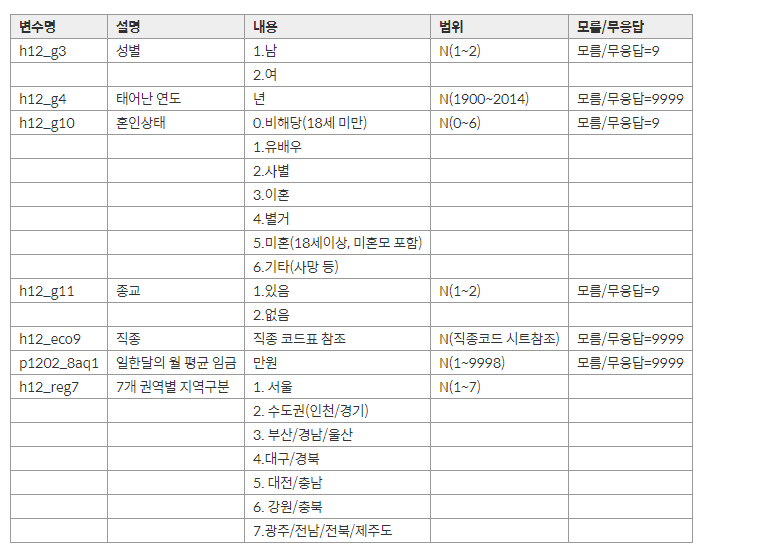

In [6]:
from IPython.display import Image
Image('./images/koweps_img.png')

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [15]:
# 해당 데이터프레임에서 제공해주는 컬럼들만 추출하여 rename
temp_df = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
temp_df.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
temp_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


**************************************************


여자    8440
남자    6982
Name: 성별2, dtype: int64

**************************************************


,명
여자,8440
남자,6982


**************************************************


,명
남자,6982
여자,8440


**************************************************


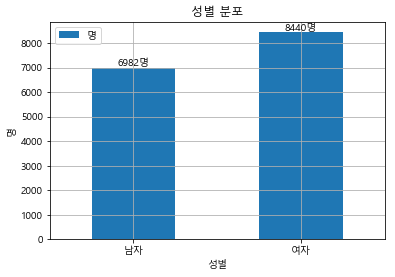

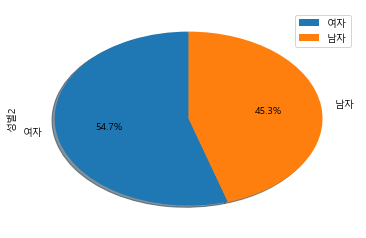

In [59]:
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화

# 성별을 남, 여로 변경
gender_filter_df = temp_df.filter(['성별'])
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자')
display(gender_filter_df.head())
print('*' * 50)

# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
display(gender_count)
print('*' * 50)

# 시리즈를 데이터프레임으로 변환
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.rename(columns = {'성별2' : '명'}, inplace = True)
display(gender_count_df)
print('*' * 50)

# 비율순으로 정렬
gender_count_df.sort_values('명', inplace = True)
display(gender_count_df)
print('*' * 50)

# 시각화
gender_count_df.plot.bar(rot = 0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

# 명 수 표시
for idx, value in enumerate(list(gender_count_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.show()

# pie plot
gender_count.plot.pie(autopct= '%.1f%%', startangle = 90, legend = True, shadow = True, labels = gender_count.index)
# plt.axis('equal')
plt.show()

In [151]:
# 성별에 따른 평균 급여 차이를 분석

# 성별과 월급 데이터만 추출
gender_salary_df = temp_df[['성별', '일한달의 월 평균 임금']]
gender_salary_df.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [152]:
# 성별을 남자와 여자로 변환
gender_salary_df['성별'] = np.where(gender_salary_df['성별'] == 1, '남자', '여자')
gender_salary_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [153]:
# 데이터 정제(결측치 확인 및 제거, 이상치 결측처리)
print(gender_salary_df.isna().sum())
gender_salary_df.dropna(inplace = True)
print('*' * 50)

print(gender_salary_df.isna().sum())

gender_salary_df['일한달의 월 평균 임금'] = np.where(
    (gender_salary_df['일한달의 월 평균 임금'] < 1) | (gender_salary_df['일한달의 월 평균 임금'] > 9998),
    np.nan, gender_salary_df['일한달의 월 평균 임금'])
print('\n')

print(gender_salary_df.isna().sum())
gender_salary_df.dropna(inplace = True)
print('*' * 50)

print(gender_salary_df.isna().sum())



# print(gender_salary_df.isna().sum())

# gender_salary_df = gender_salary_df.dropna()
# display(gender_salary_df.head())

# print(gender_salary_df.isna().sum())

성별                  0
일한달의 월 평균 임금    10915
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


성별               0
일한달의 월 평균 임금    14
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


In [154]:
# 데이터 분석(성별로 그룹화하여 그룹별 평균)
gender_salary_avg_df = gender_salary_df.groupby('성별')[['일한달의 월 평균 임금']].mean()
display(gender_salary_avg_df)

,일한달의 월 평균 임금
성별,
남자,333.422185
여자,176.359967


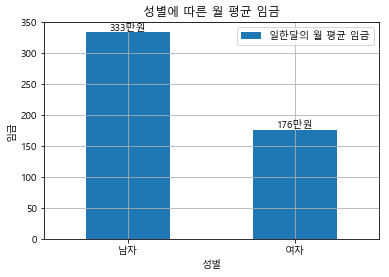

In [157]:
# 데이터 시각화
gender_salary_avg_df.plot.bar(rot = 0)
plt.title('성별에 따른 월 평균 임금')
plt.ylabel('임금')
plt.grid()

for idx, value in enumerate(list(gender_salary_avg_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.show()

In [188]:
# 나이에 따른 평균 급여 변화

# 데이터 전처리
# 태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가
birth_salary_df = temp_df[['태어난 연도', '일한달의 월 평균 임금']]
birth_salary_df['나이'] = 2020 - birth_salary_df['태어난 연도'] + 1
birth_salary_df.head()

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98


In [189]:
# 데이터 정제
# 결측값 확인, 결측값 제거, 이상치 결측처리
print(birth_salary_df.isna().sum())
birth_salary_df.dropna(inplace = True)
print('*' * 50)

print(birth_salary_df.isna().sum())


birth_salary_df['일한달의 월 평균 임금'] = np.where(
    (birth_salary_df['일한달의 월 평균 임금'] < 1) | (birth_salary_df['일한달의 월 평균 임금'] > 9998), 
    np.nan, birth_salary_df['일한달의 월 평균 임금'])

birth_salary_df['태어난 연도'] = np.where(
    (birth_salary_df['태어난 연도'] < 1900) | (birth_salary_df['태어난 연도'] > 2014), np.nan, birth_salary_df['태어난 연도'])

print('\n')

print(birth_salary_df.isna().sum())
birth_salary_df.dropna(inplace = True)
print('*' * 50)

print(birth_salary_df.isna().sum())

태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
dtype: int64
**************************************************
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64


태어난 연도           0
일한달의 월 평균 임금    14
나이               0
dtype: int64
**************************************************
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64


In [194]:
# 데이터 분석
# 나이별 급여 평균
birth_salary_df['나이대'] = np.trunc(birth_salary_df['나이'] / 10) * 10
display(birth_salary_df.head())

birth_salary_avg_df = birth_salary_df.groupby('나이대')[['일한달의 월 평균 임금']].mean()
birth_salary_avg_df

,태어난 연도,일한달의 월 평균 임금,나이,나이대
3,1942.0,108.9,79,70.0
10,1940.0,20.0,81,80.0
16,1978.0,322.0,43,40.0
17,1975.0,120.0,46,40.0
24,1975.0,300.0,46,40.0


,일한달의 월 평균 임금
나이대,
20.0,154.890476
30.0,248.058273
40.0,329.490912
50.0,314.754431
60.0,226.846086
70.0,94.149102
80.0,35.000000
90.0,22.000000


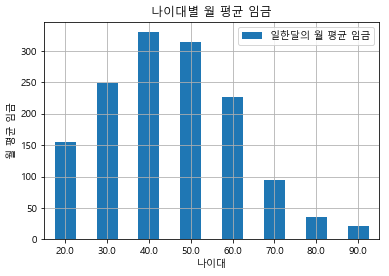

In [197]:
# 데이터 시각화
birth_salary_avg_df.plot.bar(rot = 0)
plt.grid()
plt.title('나이대별 월 평균 임금')
plt.ylabel('월 평균 임금')
plt.show()

In [210]:
# 방법 2
for i in range(len(birth_salary_df)):
    if birth_salary_df['나이'][i:i+1].values[0] < 30 :
        birth_salary_df['age_group'][i:i+1] = '20대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 40 :
        birth_salary_df['age_group'][i:i+1] = '30대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 50 :
        birth_salary_df['age_group'][i:i+1] = '40대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 60 :
        birth_salary_df['age_group'][i:i+1] = '50대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 70 :
        birth_salary_df['age_group'][i:i+1] = '60대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 80 :
        birth_salary_df['age_group'][i:i+1] = '70대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 90 :
        birth_salary_df['age_group'][i:i+1] = '80대'
    else :
        birth_salary_df['age_group'][i:i+1] = '90대'